In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [46]:
data=pd.read_csv("E:\\UK_Traffic_Accidents_2015.csv",parse_dates=['Date'])

c:\python3.8\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [47]:
data.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,201501BS70001,525130.0,180050.0,-0.198465,51.505538,1,3,1,1,2015-12-01,...,0,0,4,1,1,0,0,1,1,E01002825
1,201501BS70002,526530.0,178560.0,-0.178838,51.491836,1,3,1,1,2015-12-01,...,0,0,1,1,1,0,0,1,1,E01002820
2,201501BS70004,524610.0,181080.0,-0.205590,51.514910,1,3,1,1,2015-12-01,...,0,1,4,2,2,0,0,1,1,E01002833
3,201501BS70005,524420.0,181080.0,-0.208327,51.514952,1,3,1,1,2015-01-13,...,0,0,1,1,2,0,0,1,2,E01002874
4,201501BS70008,524630.0,179040.0,-0.206022,51.496572,1,2,2,1,2015-09-01,...,0,5,1,2,2,0,0,1,2,E01002814


In [48]:
data.shape

(140056, 32)

In [49]:
data.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
count,140029.000000,1.400290e+05,140029.000000,140029.000000,140056.000000,140056.000000,140056.000000,140056.000000,140056.000000,140056.000000,...,140056.000000,140056.000000,140056.000000,140056.000000,140056.000000,140056.000000,140056.000000,140056.000000,140056.000000,140056.000000
mean,446913.896086,2.899043e+05,-1.330458,52.496743,29.902046,2.833852,1.841014,1.329390,4.094962,343.648905,...,362.907751,0.007197,0.838807,1.952041,1.511531,1.298866,0.098839,0.061754,1.342549,1.198506
std,94893.264196,1.577932e+05,1.393585,1.420984,25.217637,0.402020,0.710046,0.795427,1.911279,258.438367,...,1263.418993,0.123806,1.931975,1.653867,1.519799,0.554714,0.697925,0.574448,0.474564,0.405991
min,70860.000000,1.062800e+04,-7.422915,49.915618,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,-1.000000,-1.000000,-1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000
25%,385626.000000,1.766380e+05,-2.216068,51.475197,6.000000,3.000000,1.000000,1.000000,2.000000,104.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
50%,451460.000000,2.408860e+05,-1.236156,52.051875,30.000000,3.000000,2.000000,1.000000,4.000000,323.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,526760.000000,3.911840e+05,-0.172506,53.414614,45.000000,3.000000,2.000000,1.000000,6.000000,517.000000,...,0.000000,0.000000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,2.000000,1.000000
max,655282.000000,1.197917e+06,1.758443,60.661117,98.000000,3.000000,37.000000,38.000000,7.000000,941.000000,...,9999.000000,2.000000,8.000000,7.000000,9.000000,5.000000,7.000000,7.000000,2.000000,3.000000


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140056 entries, 0 to 140055
Data columns (total 32 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   Accident_Index                               140056 non-null  object        
 1   Location_Easting_OSGR                        140029 non-null  float64       
 2   Location_Northing_OSGR                       140029 non-null  float64       
 3   Longitude                                    140029 non-null  float64       
 4   Latitude                                     140029 non-null  float64       
 5   Police_Force                                 140056 non-null  int64         
 6   Accident_Severity                            140056 non-null  int64         
 7   Number_of_Vehicles                           140056 non-null  int64         
 8   Number_of_Casualties                         140056 non-null  in

In [51]:
data.isnull().sum()

Accident_Index                                    0
Location_Easting_OSGR                            27
Location_Northing_OSGR                           27
Longitude                                        27
Latitude                                         27
Police_Force                                      0
Accident_Severity                                 0
Number_of_Vehicles                                0
Number_of_Casualties                              0
Date                                              0
Day_of_Week                                       0
Time                                             18
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                       0
Junction_Detail                                   0
Junction_Con

In [52]:
data=data.set_index('Date')

In [53]:
data.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-01,201501BS70001,525130.0,180050.0,-0.198465,51.505538,1,3,1,1,2,...,0,0,4,1,1,0,0,1,1,E01002825
2015-12-01,201501BS70002,526530.0,178560.0,-0.178838,51.491836,1,3,1,1,2,...,0,0,1,1,1,0,0,1,1,E01002820
2015-12-01,201501BS70004,524610.0,181080.0,-0.205590,51.514910,1,3,1,1,2,...,0,1,4,2,2,0,0,1,1,E01002833
2015-01-13,201501BS70005,524420.0,181080.0,-0.208327,51.514952,1,3,1,1,3,...,0,0,1,1,2,0,0,1,2,E01002874
2015-09-01,201501BS70008,524630.0,179040.0,-0.206022,51.496572,1,2,2,1,6,...,0,5,1,2,2,0,0,1,2,E01002814


In [61]:
data['month']=data.index.month

<AxesSubplot:>

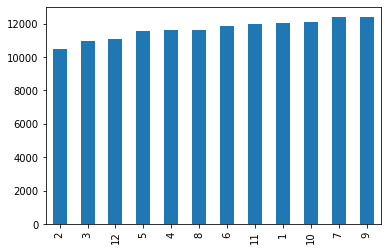

In [80]:
monthly_accidents=data['month'].value_counts()
monthly_accidents.sort_values().plot(kind='bar')  #more than 12 lakh accidents occured during 7th and 9th month

<AxesSubplot:>

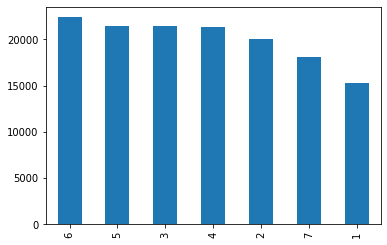

In [73]:
data['Day_of_Week'].value_counts().plot(kind='bar')    #the least numberof accidents is during 1

<AxesSubplot:>

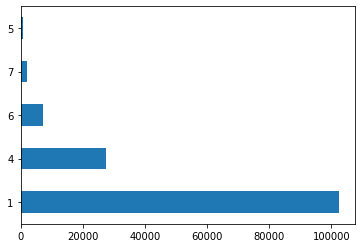

In [55]:
data['Light_Conditions'].value_counts().plot(kind='barh')   #there are more number of accidents when the light is 1

<AxesSubplot:>

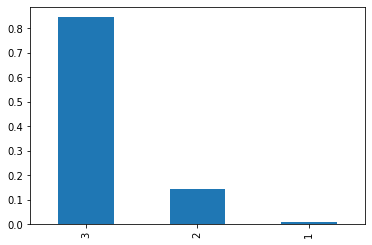

In [56]:
data['Accident_Severity'].value_counts(normalize=True).plot(kind='bar')    #more than 80 percentage of data is with severity 3

In [57]:
data['Weather_Conditions'].unique()

array([1, 2, 8, 7, 5, 9, 4, 6, 3], dtype=int64)

<AxesSubplot:>

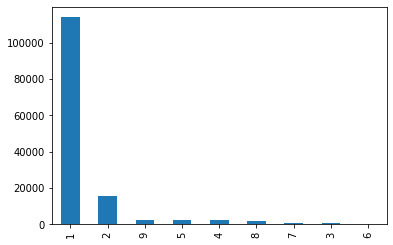

In [58]:
data['Weather_Conditions'].value_counts().plot(kind='bar')  #there are more than one lakh accidents during 1

In [88]:
data['Number_of_Casualties'].unique()

array([ 1,  2,  3,  6,  4,  5, 11,  8,  9,  7, 17, 13, 10, 16, 12, 14, 21,
       38, 36, 34, 35, 24], dtype=int64)

<AxesSubplot:>

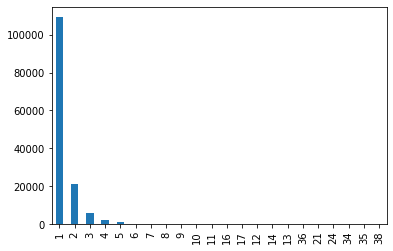

In [87]:
data['Number_of_Casualties'].value_counts().plot(kind='bar')  # in most of the cases thenumber of casualities are 1

In [90]:
data['Road_Surface_Conditions'].unique()

array([ 1,  2,  4,  3,  5, -1], dtype=int64)

<AxesSubplot:>

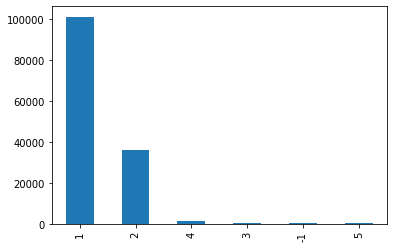

In [91]:
data['Road_Surface_Conditions'].value_counts().plot(kind='bar')  #most of the accidents occured  when road surface condition is 1

In [59]:
data.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,month
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-01,201501BS70001,525130.0,180050.0,-0.198465,51.505538,1,3,1,1,2,...,0,4,1,1,0,0,1,1,E01002825,12
2015-12-01,201501BS70002,526530.0,178560.0,-0.178838,51.491836,1,3,1,1,2,...,0,1,1,1,0,0,1,1,E01002820,12
2015-12-01,201501BS70004,524610.0,181080.0,-0.205590,51.514910,1,3,1,1,2,...,1,4,2,2,0,0,1,1,E01002833,12
2015-01-13,201501BS70005,524420.0,181080.0,-0.208327,51.514952,1,3,1,1,3,...,0,1,1,2,0,0,1,2,E01002874,1
2015-09-01,201501BS70008,524630.0,179040.0,-0.206022,51.496572,1,2,2,1,6,...,5,1,2,2,0,0,1,2,E01002814,9


<AxesSubplot:>

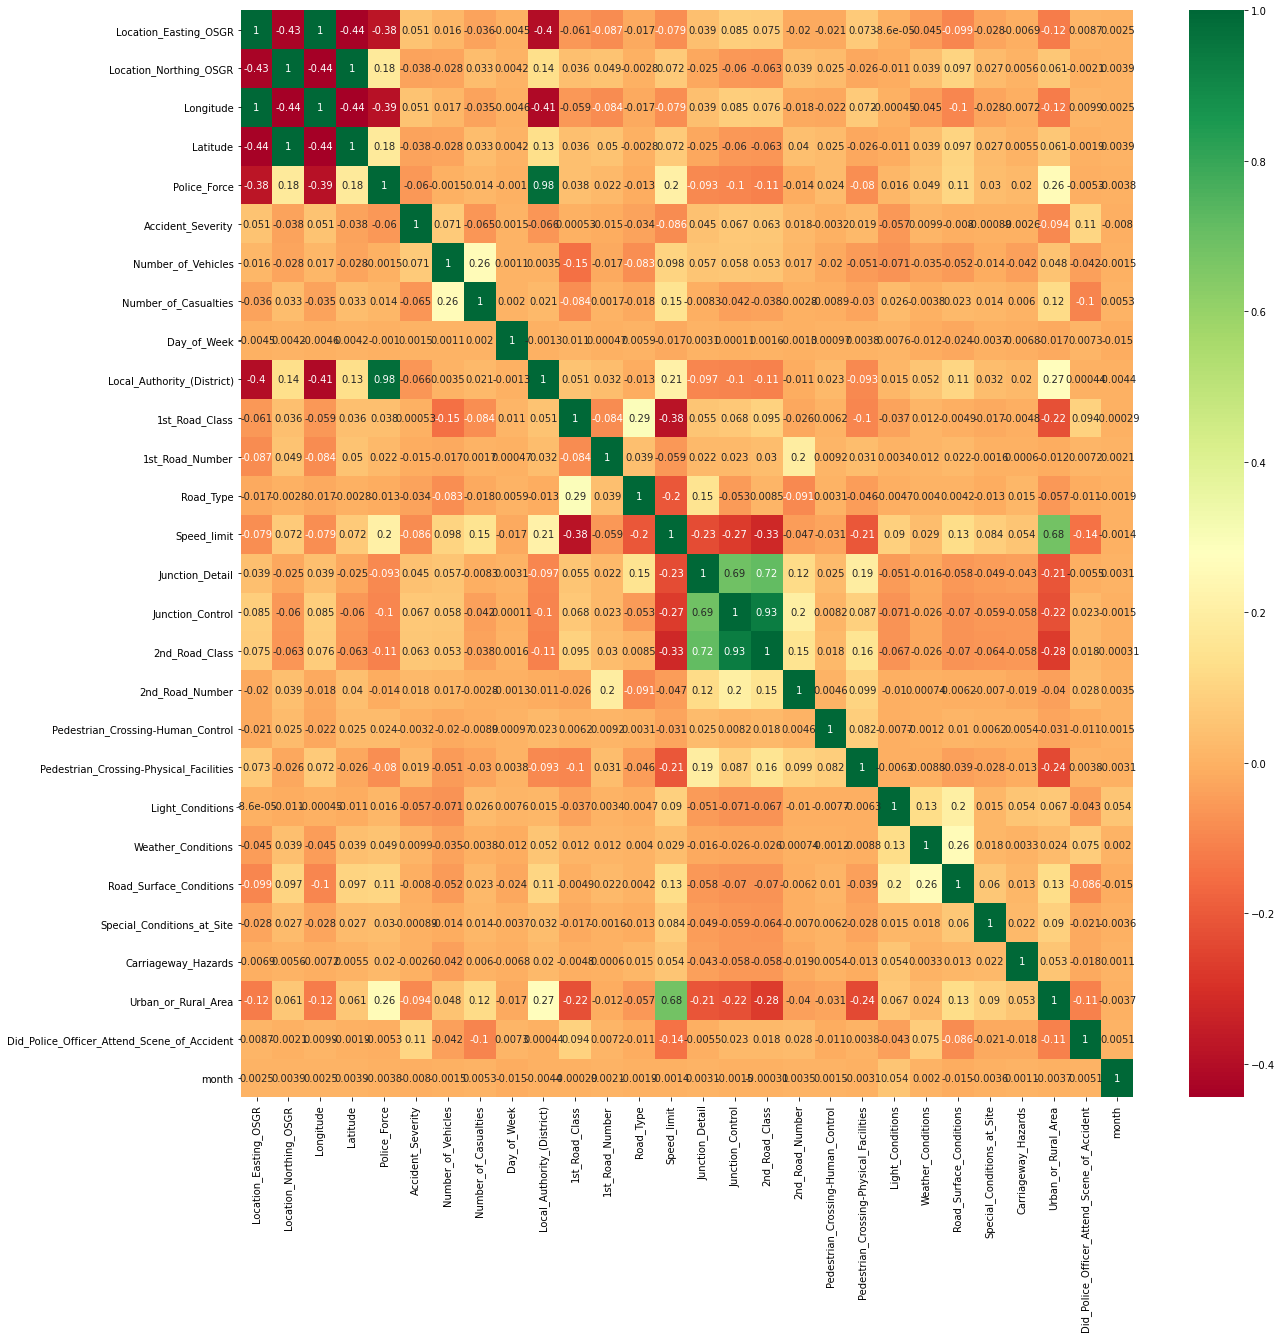

In [60]:
plt.figure(figsize=(20,20))                             # to get the correlation between the data
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')